**This Cell mounts my Google Drive data in CoLab**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Package Import**

In [ ]:
#DEFINE PACKAGES IMPORT
import os
import sys
import random
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.metrics import mean_squared_error
from math import sqrt
import csv
random.seed(2)
random_state = 2

# **Data Loading**

**Inputs: train_input; validation_input; test_input**

**Outputs: ANN_predictions OR Targets**

**ANN_predictions: train_ANN_pred; vali_ANN_pred; test_ANN_pred**

**Target: train_target; val_target; test_target**



In [ ]:
#WORKING DIRECTORY
path = '/content/drive/MyDrive/Fatone_Water/'

#DATA LOADING
xls = pd.ExcelFile(path+'/biowin_withMalfunction.xlsx')
OutputName = input('please enter the NAME of the output(BOD,COD,TSS) = ')
InputNum   = int(input('please enter the NUMBER of input parameters(6 OR 11) = '))

Data = pd.read_excel(xls,0,header=1)      

if OutputName.lower() == 'BOD'.lower(): #.lower() converts the uppercase characters into lowercase
   Output_num=1
elif OutputName.lower() == 'COD'.lower():
   Output_num=2;
elif OutputName.lower() == 'TSS'.lower():
   Output_num=3;
# Python iloc() function enables us to select a particular cell of the dataset,
# that is, it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.
if InputNum == 11:
   X = Data.iloc[:,0:-3] 
elif InputNum == 6:
   X = Data.iloc[:,[0,1,4,5,6,7]]

index = Output_num -3  
T = Data.iloc[:,index-1]

In [ ]:
# Displaying on Inputs
X

In [ ]:
T

In [ ]:
# Saving extracted data
pd.DataFrame(X).to_excel(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/Inputs.xlsx')
pd.DataFrame(T).to_excel(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/Target.xlsx')

# **ANN Architecture and parameters setting**


In [ ]:
#PARAMETERS TO SET

Loss = 'mean_squared_error'
lr = 0.001   # Learning rate

Optimizer = Adam(learning_rate=lr)

epochs = 1000
bs = 8   # batch size

In [ ]:
#DEFINE NETWORK ARCHITECTURE FUNCTION
def ANN_AP(X,T,OutputName,Loss,Optimizer):
    if OutputName.lower()   == 'BOD'.lower():
        hid_neur = [12,9,5]
    elif OutputName.lower() == 'COD'.lower():
        hid_neur = [9,8,6] 
    elif OutputName.lower() == 'TSS'.lower():
        hid_neur = [9,8,6]
    
    model = Sequential()
    model.add(Dense(hid_neur[0], input_dim=X.shape[1], activation='relu'))
    model.add(Dense(hid_neur[1], activation='relu'))
    model.add(Dense(hid_neur[2], activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(loss=Loss, optimizer=Optimizer, metrics=['MeanAbsoluteError'])

    return model

# Standardazation is done only on **inputs** and we used train data average and standard deviation to make all the data (including ttrain, test, and validation) standard**
The standardazation is done using the following equation
xi_standard = (xi - mean(train_inputs_x))/std(train_inputs_x)

In [ ]:
#SPLIT AND SCALE DATA
# y_train: train_target    y_train_ANN: the outputs of ANN for train dataset
# y_test:  test_target
# y_val:   val_target
x_tv, x_test, y_tv, y_test = train_test_split(X, T, test_size=0.25, shuffle= True, random_state = random_state)
x_train, x_valid, y_train, y_valid = train_test_split(x_tv, y_tv, test_size=0.20, shuffle= True, random_state = random_state)
print(x_train.shape, x_valid.shape, x_test.shape)

# Transform
ss = StandardScaler()
ss.fit(x_train)   # This line: use the train inputs mean and std to make all the data standard
x_train_scaled = ss.transform(x_train)
x_valid_scaled = ss.transform(x_valid)
x_test_scaled  = ss.transform(x_test)

In [ ]:
# Saving extracted data
# x_train = pd.DataFrame (x_train)   # x_train was numpy.ndarray which is changed to data frame type

x_train.to_excel(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/x_train.xlsx')
x_valid.to_excel(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/x_valid.xlsx')
x_test.to_excel(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/x_test.xlsx')

y_train.to_excel(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/y_train.xlsx')
y_valid.to_excel(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/y_valid.xlsx')
y_test.to_excel(path+'Basic_ANN models/' + OutputName  +'_'+str(InputNum)+' inputs/y_test.xlsx')

pd.DataFrame(x_train_scaled).to_excel(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/x_train_scaled.xlsx')
pd.DataFrame(x_test_scaled).to_excel(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/x_test_scaled.xlsx')
pd.DataFrame(x_valid_scaled).to_excel(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/x_valid_scaled.xlsx')

In [13]:
#CALL AND TRAIN NETWORK

NeuNet = ANN_AP(X,T,OutputName,Loss,Optimizer)

es = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
history = NeuNet.fit(x_train_scaled, y_train, validation_data = (x_valid_scaled,y_valid), epochs=epochs, batch_size=bs, verbose=1, callbacks=[es])

#Save trained model
NeuNet.save(path+'Basic_ANN models/' + OutputName +' results/' + str(InputNum) +' input parameters/ANN_'+OutputName+'_'+ str(InputNum)+' Inputs' )

Epoch 1/1000
736/736 [==============================] - 2s 2ms/step - loss: 7.6377 - mean_absolute_error: 2.0031 - val_loss: 1.7297 - val_mean_absolute_error: 0.9740
Epoch 2/1000
736/736 [==============================] - 1s 2ms/step - loss: 1.3461 - mean_absolute_error: 0.8679 - val_loss: 0.9908 - val_mean_absolute_error: 0.7510
Epoch 3/1000
736/736 [==============================] - 1s 2ms/step - loss: 0.9548 - mean_absolute_error: 0.7165 - val_loss: 0.7866 - val_mean_absolute_error: 0.6423
Epoch 4/1000
736/736 [==============================] - 1s 2ms/step - loss: 0.8094 - mean_absolute_error: 0.6419 - val_loss: 0.7015 - val_mean_absolute_error: 0.5848
Epoch 5/1000
736/736 [==============================] - 1s 2ms/step - loss: 0.7295 - mean_absolute_error: 0.5976 - val_loss: 0.6759 - val_mean_absolute_error: 0.5541
Epoch 6/1000
736/736 [==============================] - 1s 2ms/step - loss: 0.6745 - mean_absolute_error: 0.5688 - val_loss: 0.6174 - val_mean_absolute_error: 0.5367
Epoc

**### Display Mean Absolute Error (MAE) and Mean Square Error (MSE) during training process**

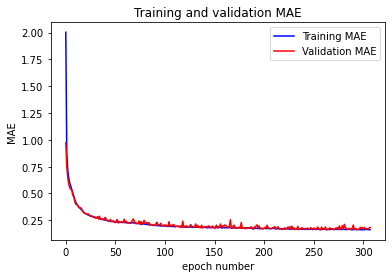

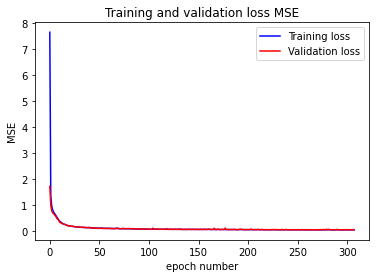

In [14]:
#PLOT TRAINING CURVES
MAE = history.history['mean_absolute_error'] 
valid_MAE = history.history['val_mean_absolute_error'] 
loss = history.history['loss']
valid_loss = history.history['val_loss']
lista = [loss,valid_loss,MAE,valid_MAE]
epochs = range(len(loss))


plt.plot(epochs, MAE, 'b', label='Training MAE')
plt.plot(epochs, valid_MAE, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.xlabel("epoch number")
plt.ylabel("MAE")
plt.savefig(path+'Basic_ANN models/' + OutputName +' results/' + str(InputNum) +' input parameters/Training and validation MAE.tif', format='tif', dpi=300)

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title('Training and validation loss MSE')
plt.legend()
plt.xlabel("epoch number")
plt.ylabel("MSE")
plt.savefig(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/Training and validation loss MSE.tif', format='tif', dpi=300)

# **Evaluating the accuracy of the developed ANN network for train, validation, and test dataset**
We have Inputs (11 inputs or 6 inputs) and Outputs (BOD, COD, or TSS)

**Outputs can be Observed (real) values: known as TARGET outputs**

**Outputs can be ANN Predicted values: known as ANN outputs**

In [15]:
# Evaluating the ANN accuracy for train outputs
# y_train refers to the TARGET outputs of train dataset; the same for y_valid and y_test
# y_train_ANN refers to the ANN predicted outputs of train dataset; the same for y_valid_ANN and y_test_ANN

y_train_ANN = NeuNet.predict(x_train_scaled).flatten()
y_valid_ANN = NeuNet.predict(x_valid_scaled).flatten()
y_test_ANN  = NeuNet.predict(x_test_scaled).flatten()

# Save the ANN predictions into the folder 
pd.DataFrame(y_train_ANN).to_excel(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/y_train_ANN.xlsx')
pd.DataFrame(y_valid_ANN).to_excel(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/y_valid_ANN.xlsx')
pd.DataFrame(y_test_ANN).to_excel(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/y_test_ANN.xlsx')


CC_train    = pearsonr(y_train,y_train_ANN)   #it should be the same thing of MATLAB 'corr' 
RMSE_train  = sqrt(mean_squared_error(y_train,y_train_ANN))
SI_train    = sqrt(mean_squared_error(y_train,y_train_ANN))/np.mean(y_train)
BIAS_train  = np.sum(y_train_ANN - y_train)/y_train.shape[0]

CC_test     = pearsonr(y_test,y_test_ANN)   #it should be the same thing of MATLAB 'corr' 
RMSE_test   = sqrt(mean_squared_error(y_test,y_test_ANN))
SI_test     = sqrt(mean_squared_error(y_test,y_test_ANN))/np.mean(y_test)
BIAS_test   = np.sum(y_test_ANN - y_test)/y_test.shape[0]

CC_valid    = pearsonr(y_valid,y_valid_ANN)   #it should be the same thing of MATLAB 'corr' 
RMSE_valid  = sqrt(mean_squared_error(y_valid,y_valid_ANN))
SI_valid    = sqrt(mean_squared_error(y_valid,y_valid_ANN))/np.mean(y_valid)
BIAS_valid  = np.sum(y_valid_ANN - y_valid)/y_valid.shape[0]

# Writting the results in an Excel file
s = f"""
{'-'*40}
# Full data set set (train-validation-test)
# CC: {CC_train[0],CC_valid[0],CC_test[0]}
# RMSE: {RMSE_train,RMSE_valid,RMSE_test}
# SI: {SI_train,SI_valid,SI_test}
# BIAS: {BIAS_train,BIAS_valid,BIAS_test}
{'-'*40}
"""
print(s)

with open(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/StatisticalIndices.csv', "w") as f:
  writer = csv.writer(f)
  writer.writerow(['Data_type','CC','RMSE','SI','BIAS'])
  writer.writerow(['Train set',CC_train[0],RMSE_train,SI_train,BIAS_train])
  writer.writerow(['Validation set',CC_valid[0],RMSE_valid,SI_valid,BIAS_valid])
  writer.writerow(['Test set',CC_test[0],RMSE_test,SI_test,BIAS_test])




----------------------------------------
# Full data set set (train-validation-test)
# CC: (0.9842251949456603, 0.9830343373934226, 0.9786230341101428)
# RMSE: (0.22862985544567765, 0.2331998674888775, 0.26747970214173383)
# SI: (0.0366642982203382, 0.03756523016244194, 0.042842920047842)
# BIAS: (-0.031824870146654555, -0.021675545726499334, -0.03769071526310693)
----------------------------------------



# **Plotting the ANN predictions for train, validation, and test datasets**

For to better display, we sorted the datasets from small to large

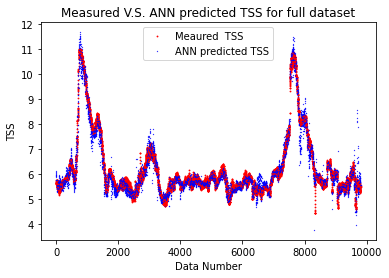

In [16]:
# Time Series Plot for measured and predicted output
plt.figure()
plt.plot(y_train, 'ro',markersize=2, markevery=1, marker='h', markeredgecolor='black', markeredgewidth=0.0)
Ali = pd.Series(y_train_ANN)
Ali.index = y_train.index
plt.plot(Ali, 'b*',markersize=2, markevery=1, marker='*', markeredgecolor='black', markeredgewidth=0.0,linewidth=1)


plt.plot(y_test, 'ro',markersize=2, markevery=1, marker='h', markeredgecolor='black', markeredgewidth=0.0)
Ali = pd.Series(y_test_ANN)
Ali.index = y_test.index
plt.plot(Ali, 'b*',markersize=2, markevery=1, marker='*', markeredgecolor='black', markeredgewidth=0.0,linewidth=1)

plt.plot(y_valid, 'ro',markersize=2, markevery=1, marker='h', markeredgecolor='black', markeredgewidth=0.0, label='Meaured  '+ OutputName)
Ali = pd.Series(y_valid_ANN)
Ali.index = y_valid.index
plt.plot(Ali, 'b*',markersize=2, markevery=1, marker='*', markeredgecolor='black', markeredgewidth=0.0,linewidth=1, label='ANN predicted '+OutputName)

plt.title('Measured V.S. ANN predicted '+OutputName+ ' for full dataset')
plt.legend()
plt.xlabel("Data Number")
plt.ylabel(OutputName)
plt.savefig(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/Time series full Data.tif', format='tif', dpi=300)

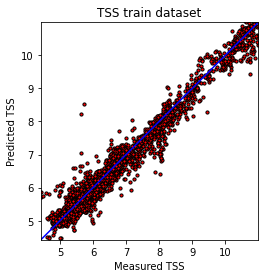

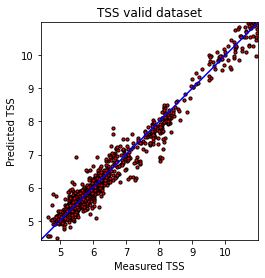

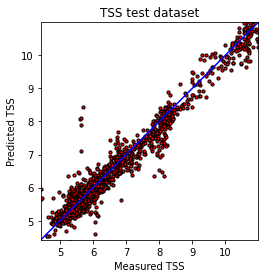

In [17]:
# Scatter Plot for measured and predicted output
plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_train, y_train_ANN,color='red',marker= 'o',s=10,edgecolor='black',alpha=None,linewidths=1)
plt.xlabel('Measured '+OutputName)
plt.ylabel('Predicted '+OutputName)
lims = [y_train.min(), y_train.max()]
plt.xlim(lims)
plt.ylim(lims)
plt.title(OutputName+ ' train dataset')
_ = plt.plot(lims, lims,color='blue')
plt.savefig(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/Scatter plot train Data.tif', format='tif', dpi=300)

plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_valid, y_valid_ANN,color='red',marker= 'o',s=10,edgecolor='black',alpha=None,linewidths=1)
plt.xlabel('Measured '+OutputName)
plt.ylabel('Predicted '+OutputName)
lims = [y_train.min(), y_train.max()]
plt.xlim(lims)
plt.ylim(lims)
plt.title(OutputName+ ' valid dataset')
_ = plt.plot(lims, lims,color='blue')
plt.savefig(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/Scatter plot validation Data.tif', format='tif', dpi=300)

plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_test_ANN,color='red',marker= 'o',s=10,edgecolor='black',alpha=None,linewidths=1)
plt.xlabel('Measured '+OutputName)
plt.ylabel('Predicted '+OutputName)
lims = [y_train.min(), y_train.max()]
plt.xlim(lims)
plt.ylim(lims)
plt.title(OutputName+ ' test dataset')
_ = plt.plot(lims, lims,color='blue')
plt.savefig(path+'Basic_ANN models/' + OutputName +'_'+str(InputNum)+' inputs/Scatter plot test Data.tif', format='tif', dpi=300)